# Download EO data with `sentinelsat`

In [1]:
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter
from collections import OrderedDict
from pathlib import Path
from datetime import date
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt


print('All libraries successfully imported!')
print(f'sentinelsat : {sentinelsat.__version__}')

All libraries successfully imported!
sentinelsat : 1.1.0


## Set directory

In [2]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_letter    = 'X'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'

roi_path = f'{work_path}ROI/'
dwl_path = f'{work_path}DOWNLOAD/'

Path(dwl_path).mkdir(parents=True, exist_ok=True)

## Set Region of Interest

### 1. Open ROI shapefile

In [3]:
crs_dst = 'EPSG:32631'

roi_name = 'extent_roi'
roi_filename = f'{roi_name}_{crs_dst[5:]}.shp'

roi_file      = f'{roi_path}{roi_filename}'
roi_file_json = f'{roi_path}{roi_name}_4326.geojson'

roi_gdf = gpd.read_file(roi_file)

print(f'ROI shapefile : {roi_file}')

ROI shapefile : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ROI/extent_roi_32631.shp


### 2. Reproject to WGS 84 if necessary


In [4]:
if roi_gdf.crs != 'epsg:4326':
    print(f'Old CRS : {roi_gdf.crs}')
    
    roi_gdf = roi_gdf.to_crs('epsg:4326')

    print((f'New CRS : {roi_gdf.crs}'))

Old CRS : epsg:32631
New CRS : epsg:4326


### 3. Save ROI as GeoJSON file


In [5]:
roi_gdf.to_file(roi_file_json, driver='GeoJSON')

print(f'ROI GeoJSON file : {roi_file_json}')

ROI GeoJSON file : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ROI/extent_roi_4326.geojson


## Authentification

The Copernicus Open Access Hub and probably most Data Hubs require authentication.

You can provide your credentials with **SentinelAPI(your username , your password)**


In [6]:
user     = 'ndeffense'
password = 'lbrat2104'

# Connect to the API

api = SentinelAPI(user, password, 'https://apihub.copernicus.eu/apihub')

## Sorting & Filtering

In addition to the *search query keywords* sentinelsat allows filtering and sorting of search results before download. To simplify these operations sentinelsat offers the convenience functions `to_geojson()`, `to_dataframe()` and `to_geodataframe()` which return the search results as a GeoJSON object, Pandas DataFrame or a GeoPandas GeoDataFrame, respectively. `to_dataframe()` and `to_geodataframe()` require pandas and geopandas to be installed, respectively.

In this example we query Sentinel-2 scenes over a location and convert the query results to a Pandas DataFrame. The DataFrame is then sorted by cloud cover and ingestion date. We limit the query to first 5 results within our timespan and download them, starting with the least cloudy scene. Filtering can be done with all data types, as long as you pass the id to the download function.

In [7]:
start_date    = date(2021, 10, 1)
end_date      = date(2021, 11, 30)

dates = (start_date, end_date)

platform_name = 'Sentinel-2'

# Sentinel-2
#s2_level      = 'Level-1C'
#product_type  = 'S2MSI1C'

s2_level      = 'Level-2A'
product_type  = 'S2MSI2A'

cloud_cover   = (0,90)
s2_tile       = '31UFS'

# Sentinel-1
polarisation_mode =  'VV VH'

### Search by polygon, time, and SciHub query keywords

In [8]:
footprint = geojson_to_wkt(read_geojson(roi_file_json))

if platform_name == 'Sentinel-2':

    products = api.query(footprint,
                        date = dates,
                        platformname = platform_name,
                        processinglevel = s2_level,
                        producttype = product_type,
                        cloudcoverpercentage = cloud_cover)

# Convert to pandas DataFrame

df = api.to_dataframe(products)

display(df.head())

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid
eebdc6f2-e351-4664-bc8c-049560fb20b1,S2A_MSIL2A_20211128T104411_N0301_R008_T31UFS_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-28T10:44:11.024Z, Instrument: MS...",false,2021-11-28 13:40:10,2021-11-28 10:44:11.024,2021-11-28 10:44:11.024,2021-11-28 15:57:25.295,...,GS2A_20211128T104411_033610_N03.01,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20211128T134010_S2021...,S2A_OPER_MSI_L2A_TL_VGS2_20211128T134010_A0336...,S2A_MSIL2A_20211128T104411_N0301_R008_T31UFS_2...,eebdc6f2-e351-4664-bc8c-049560fb20b1
6fc27276-c3b4-4573-a872-f3ec81822498,S2B_MSIL2A_20211126T105309_N0301_R051_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-26T10:53:09.024Z, Instrument: MS...",false,2021-11-26 12:59:46,2021-11-26 10:53:09.024,2021-11-26 10:53:09.024,2021-11-26 18:00:54.242,...,GS2B_20211126T105309_024673_N03.01,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20211126T125946_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20211126T125946_A0246...,S2B_MSIL2A_20211126T105309_N0301_R051_T31UES_2...,6fc27276-c3b4-4573-a872-f3ec81822498
d99f7ed0-19aa-491a-b35d-3758c0b36e24,S2B_MSIL2A_20211126T105309_N0301_R051_T31UFR_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-26T10:53:09.024Z, Instrument: MS...",false,2021-11-26 12:59:46,2021-11-26 10:53:09.024,2021-11-26 10:53:09.024,2021-11-26 17:59:28.316,...,GS2B_20211126T105309_024673_N03.01,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20211126T125946_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20211126T125946_A0246...,S2B_MSIL2A_20211126T105309_N0301_R051_T31UFR_2...,d99f7ed0-19aa-491a-b35d-3758c0b36e24
cb702f82-efcb-4a53-8a3c-73270742a73c,S2B_MSIL2A_20211126T105309_N0301_R051_T31UER_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-26T10:53:09.024Z, Instrument: MS...",false,2021-11-26 12:59:46,2021-11-26 10:53:09.024,2021-11-26 10:53:09.024,2021-11-26 17:55:41.179,...,GS2B_20211126T105309_024673_N03.01,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20211126T125946_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20211126T125946_A0246...,S2B_MSIL2A_20211126T105309_N0301_R051_T31UER_2...,cb702f82-efcb-4a53-8a3c-73270742a73c
73ec4e85-e6cf-40e1-a19d-775e695b07d0,S2B_MSIL2A_20211126T105309_N0301_R051_T31UFS_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-26T10:53:09.024Z, Instrument: MS...",false,2021-11-26 12:59:46,2021-11-26 10:53:09.024,2021-11-26 10:53:09.024,2021-11-26 17:45:39.019,...,GS2B_20211126T105309_024673_N03.01,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20211126T125946_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20211126T125946_A0246...,S2B_MSIL2A_20211126T105309_N0301_R051_T31UFS_2...,73ec4e85-e6cf-40e1-a19d-775e695b07d0


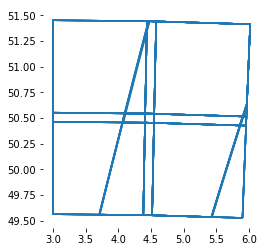

In [40]:
products_gdf = api.to_geodataframe(products)

fig, ax = plt.subplots(1, 1)

products_gdf.boundary.plot(ax=ax)

plt.box(False)

In [9]:
#tiles_list = df['tileid'].drop_duplicates().values
#print(f'Selected tiles : {tiles_list}')

df = df.sort_values('ingestiondate', ascending=True)

#selected_tile_df = df[df['tileid'] == s2_tile]
selected_tile_df = df[df['title'].str.contains(s2_tile)]


print(selected_tile_df['title'])


bd214fb6-6244-4968-a143-274e87711d68    S2B_MSIL2A_20211004T103809_N0301_R008_T31UFS_2...
3781cac7-8459-4f61-b9ad-4c0aa8ffc89d    S2B_MSIL2A_20211007T104829_N0301_R051_T31UFS_2...
5b3e486e-e97f-411e-a192-640e814e2dbe    S2A_MSIL2A_20211009T103941_N0301_R008_T31UFS_2...
58818ce5-9e33-4ca8-8c0c-b3c4cc2a20b5    S2A_MSIL2A_20211012T105011_N0301_R051_T31UFS_2...
3a0c28d2-6786-462a-86e1-3aa1d3fb33d4    S2B_MSIL2A_20211014T103919_N0301_R008_T31UFS_2...
bd3a133f-6138-4a24-8f26-5fbb948742ab    S2A_MSIL2A_20211022T105111_N0301_R051_T31UFS_2...
56ad8352-c118-4296-a4a9-c2b6a921a21c    S2B_MSIL2A_20211024T104029_N0301_R008_T31UFS_2...
58de57de-c19a-488c-a683-154bbd9c96a8    S2B_MSIL2A_20211027T105049_N0301_R051_T31UFS_2...
78169a79-b453-45c6-b767-990dbe98e2e6    S2A_MSIL2A_20211029T104151_N0301_R008_T31UFS_2...
c1dceaaa-7fb7-4227-9983-e7bc2f56b505    S2A_MSIL2A_20211101T105211_N0301_R051_T31UFS_2...
27af21d8-e0bb-4fbf-a232-e64e3dcea5be    S2A_MSIL2A_20211111T105301_N0301_R051_T31UFS_2...
3493cd63-0

In [10]:
test = selected_tile_df[2:3]['filename']

print(test.index)

display(selected_tile_df[2:3])

Index(['5b3e486e-e97f-411e-a192-640e814e2dbe'], dtype='object')


,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid
5b3e486e-e97f-411e-a192-640e814e2dbe,S2A_MSIL2A_20211009T103941_N0301_R008_T31UFS_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-10-09T10:39:41.024Z, Instrument: MS...",false,2021-10-09 13:45:36,2021-10-09 10:39:41.024,2021-10-09 10:39:41.024,2021-10-09 16:24:54.742,...,GS2A_20211009T103941_032895_N03.01,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20211009T134536_S2021...,S2A_OPER_MSI_L2A_TL_VGS2_20211009T134536_A0328...,S2A_MSIL2A_20211009T103941_N0301_R008_T31UFS_2...,5b3e486e-e97f-411e-a192-640e814e2dbe


### Download product

In [16]:
#api.download_all(test.index, directory_path=dwl_path)

# define the filter function to select files (to be excluded in this case)
path_filter = make_path_filter("*Measurement/*", exclude=True)

api.download_all(['5b3e486e-e97f-411e-a192-640e814e2dbe'], directory_path=dwl_path, nodefilter=path_filter)


#api.download_all(selected_tile_df[2:3], directory_path=dwl_path, path_filter)

SHA3_256 checksumming:   0%|          | 0.00/53.6k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/24.5M [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/5.48k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/810 [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/654k [00:00<?, ?B/s]

SHA3_256 checksumming:   0%|          | 0.00/118M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
footprint = geojson_to_wkt(read_geojson('search_polygon.geojson'))

products = api.query(footprint,
                     producttype='SLC',
                     orbitdirection='ASCENDING',
                     limit=10)

api.download_all(products)

In [33]:
tiles = ['33VUC', '33UUB']

query_kwargs = {
        'platformname': platform_name,
        'producttype': product_type,
        'date': dates}

products = OrderedDict()
for tile in tiles:
    kw = query_kwargs.copy()
    kw['tileid'] = tile
    pp = api.query(**kw)
    products.update(pp)

print(products)

OrderedDict()
